## 3.3 MCMC as UM-Bridge Client

The following code provides the MCMC algorithm as an UM-Bridge Client, where the target distribution is running as UM-Bridge model (see `MCMC_posterior_server.ipynb`). As for the target distribution we use here log densities.

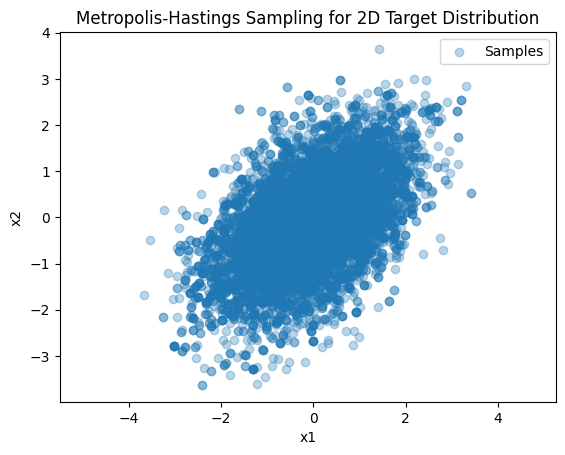

In [2]:
import umbridge
import numpy as np
import matplotlib.pyplot as plt

# Connect to the Umbridge model
model = umbridge.HTTPModel("http://0.0.0.0:4242", "posterior")

# Define the proposal distribution
def proposal_distribution(x, proposal_cov=np.eye(2)):
    return np.random.multivariate_normal(x, proposal_cov)

# Metropolis-Hastings algorithm
def metropolis_hastings(initial_state, num_samples, model, proposal_distribution, proposal_cov=np.eye(2)):
    samples = []  # List to store the samples
    x = initial_state.tolist()  # Start from the initial state

    for j in range(num_samples):
        # Given the current state x_j = x, draw a realization x' from Q(x, .)
        x_prime = proposal_distribution(np.array(x), proposal_cov).tolist()

        # Compute the acceptance probability α(x, x')
        current_log_pdf = model([x])[0][0]
        proposed_log_pdf = model([x_prime])[0][0]
        log_alpha = min(0, proposed_log_pdf - current_log_pdf)

        # Draw an independent sample u_j+1 ~ uniform[0, 1]
        log_u = np.log(np.random.uniform(0, 1))

        if log_u <= log_alpha:
            x = x_prime  # Accept the new state

        samples.append(x)  # Store the current state (whether accepted or not)

    return np.array(samples)

# Parameters
initial_state = np.array([0, 0])
num_samples = 10000

# Run Metropolis-Hastings algorithm
samples = metropolis_hastings(initial_state, num_samples, model, proposal_distribution)
  
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, label='Samples')
plt.title('Metropolis-Hastings Sampling for 2D Target Distribution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axis('equal')
plt.show()